## Initialize packges

In [14]:
import requests
import json
import xml.etree.ElementTree as ET
import json, os
import re
from typing import Any, List, Type
import html
import pandas as pd
# !pip install pandas

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import nltk
nltk.download('punkt_tab')

from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# %pip install lxml
df = pd.read_xml('https://hookandloop.com/feeds/elx_product_feed.xml')
df.head()


,id,title,link,image_link,availability,price,description,shipping_weight,measurement_sold_in_size,product_type,measurement_sold_in_unit,childrens,price_range,parent,color,size,width,discount,style
0,DGSPE-1707,DuraGrip® Brand Specialty Fasteners,https://www.hookandloop.com/catalog/product/vi...,https://www.hookandloop.com/media/catalog/prod...,In Stock,USD162.50,", Part Number:DGSPE-1707, Brand:DuraGrip, Sold...",575.00lbs,25.0,simple,25 Yard Rolls (900 Inches),None,None,None,None,None,None,None,None
1,Fasteners-DG-Sew-On,DuraGrip® Brand Sew On Hook and Loop Fasteners,https://www.hookandloop.com/catalog/product/vi...,https://www.hookandloop.com/media/catalog/prod...,In Stock,USD0.00,"<p dir=""ltr"">DuraGrip Brand sew on hook and lo...",None,25.0,configurable,Sold On 25 Yard Rolls (900 Inches),"DG38WHHS,DG38BLLS,DG38WHLS,DG12BLHS,DG12WHHS,D...",USD9.75 - USD92.00,None,None,None,None,None,None
2,VSEWON-181214,VELCRO® Brand Sew On Hook and Loop Fasteners,https://www.hookandloop.com/catalog/product/vi...,https://www.hookandloop.com/media/catalog/prod...,In Stock,USD0.00,"<p dir=""ltr""><span>VELCRO</span><span>® </span...",None,25.0,configurable,Sold On 25 Yard Rolls (900 Inches),"W199927,190592,190660,190749,190181,190367,190...",USD13.25 - USD411.25,None,None,None,None,None,None
3,VVC-192342,VELCRO® Brand VELCOIN® Hook and Loop Fasteners,https://www.hookandloop.com/catalog/product/vi...,https://www.hookandloop.com/media/catalog/prod...,In Stock,USD0.00,"<p dir=""ltr""><span>Also referred to as coins, ...",None,1.0,configurable,Sold On 25 Yard Rolls (900 Inches),"192253,194122,192245,192268,192272,192289,1922...",USD45.94 - USD117.50,None,None,None,None,None,None
4,DC-DGC78WHL,DuraGrip® Brand Hook and Loop Coins,https://www.hookandloop.com/catalog/product/vi...,https://www.hookandloop.com/media/catalog/prod...,In Stock,USD0.00,"<p dir=""ltr""><span>Also referred to as hook an...",None,1.0,configurable,Sold On 25 Yard Rolls (900 Inches),"DGC38BLH,DGC38BLL,DGC12WHL,DGC12BLL,DGC12WHH,D...",USD27.85 - USD63.00,None,None,None,None,None,None


In [ ]:
df.describe()


In [5]:
simple_df = df[df['product_type'] == 'simple']
configurable_df = df[df['product_type'] == 'configurable']


In [ ]:
simple_df.head()


In [ ]:
print(simple_df.isnull().sum())


In [6]:
len(simple_df[simple_df['price_range'].notnull()])


0

In [ ]:
print(simple_df.notnull().sum())


In [7]:
print(configurable_df.isnull().sum())


id                           0
title                        0
link                         0
image_link                   0
availability                 0
price                        0
description                  0
shipping_weight             60
measurement_sold_in_size     0
product_type                 0
measurement_sold_in_unit     0
childrens                    0
price_range                  0
parent                      62
color                       62
size                        62
width                       62
discount                    62
style                       62
dtype: int64


In [ ]:
simple_df.head()


In [ ]:
configurable_df.head(2)["description"]


In [8]:
new_df = pd.DataFrame({'merged_text': simple_df['title'] + ' ' + simple_df['description']})


In [ ]:
new_df.head()


In [9]:
# Tokenize function
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply tokenization to the 'merged_text' column
new_df['tokenized_text'] = new_df['merged_text'].apply(tokenize_text)

# Create a new dataframe with the tokenized text
tokenized_df = pd.DataFrame({'tokenized_text': new_df['tokenized_text']})

# Display the tokenized dataframe
tokenized_df.head()


,tokenized_text
0,"[DuraGrip®, Brand, Specialty, Fasteners, ,, Pa..."
47,"[DuraGrip®, Brand, Hook, and, Loop, Fasteners,..."
48,"[VELCRO®, Brand, Hook, and, Loop, Fasteners, ,..."
60,"[VELCRO®, Brand, Specialty, Fasteners, ,, Part..."
64,"[Social, Distancing, Strap-Beige, <, p, >, Loo..."


In [ ]:
tokenized_df['tokenized_text'][0]


In [10]:
import string
from nltk.corpus import stopwords

# Remove punctuation
tokenized_df['tokenized_text'] = tokenized_df['tokenized_text'].apply(lambda x: [word for word in x if word not in string.punctuation])

# Remove numerical values
tokenized_df['tokenized_text'] = tokenized_df['tokenized_text'].apply(lambda x: [word for word in x if not word.isdigit()])

# Remove stop words
stop_words = set(stopwords.words('english'))
tokenized_df['tokenized_text'] = tokenized_df['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


In [25]:
tokenized_df['tokenized_text'].head()


0     [DuraGrip®, Brand, Specialty, Fasteners, Part,...
47    [DuraGrip®, Brand, Hook, Loop, Fasteners, Part...
48    [VELCRO®, Brand, Hook, Loop, Fasteners, Part, ...
60    [VELCRO®, Brand, Specialty, Fasteners, Part, N...
64    [Social, Distancing, Strap-Beige, p, Looking, ...
Name: tokenized_text, dtype: object

In [26]:
tokenized_df.isnull().sum()


tokenized_text    0
dtype: int64

In [27]:
len(tokenized_df)


6010

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokenized_df.columns
# Convert the tokenized text into a list of strings
tokenized_text_strings = [' '.join(tokens) for tokens in tokenized_df['tokenized_text']]

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the tokenized text
tfidf_matrix = vectorizer.fit_transform(tokenized_text_strings)

# Get the feature names (tokens)
feature_names = vectorizer.get_feature_names_out()

# Print the first 10 feature names
print(feature_names[:10])

# Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


['000' '0058' '0075' '0100' '0150' '0200' '028' '035' '10' '100']
(6010, 7087)


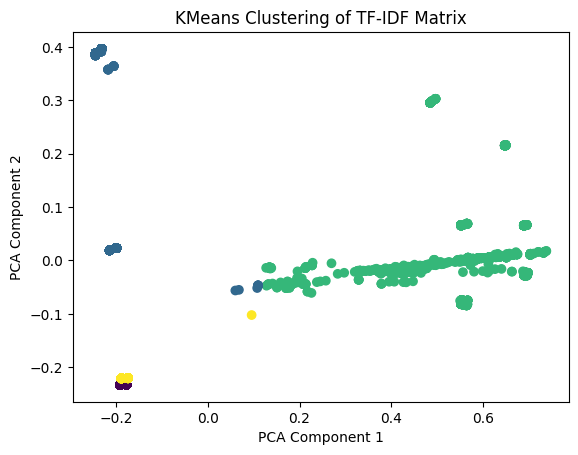

In [36]:
from sklearn.cluster import KMeans

# Set the number of clusters
num_clusters = 4

# Create an instance of KMeans clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the tfidf_matrix to the KMeans algorithm
kmeans.fit(tfidf_matrix)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Plot the clusters
plt.scatter(reduced_tfidf_matrix[:, 0], reduced_tfidf_matrix[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering of TF-IDF Matrix')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


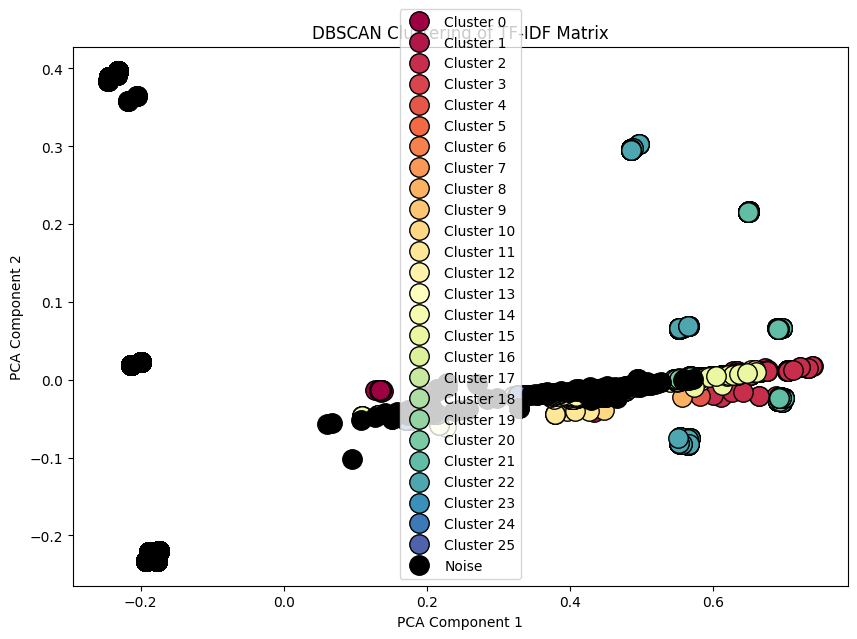

In [31]:
dbscan = DBSCAN(eps=0.3, min_samples=5, metric='cosine')
clusters = dbscan.fit_predict(tfidf_matrix)

# Step 4: Visualize the clusters
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=8)
reduced_tfidf_matrix = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 7))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = reduced_tfidf_matrix[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering of TF-IDF Matrix')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add color legend
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        label = 'Noise'
    else:
        label = f'Cluster {k}'
    
    plt.plot([], [], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, label=label)

plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Fit the tfidf_matrix to the KMeans algorithm
kmeans.fit(tfidf_matrix)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Calculate the Silhouette Coefficient
silhouette_score = silhouette_score(tfidf_matrix, cluster_labels)

# Calculate the Adjusted Rand Index
adjusted_rand_index = adjusted_rand_score(ground_truth_labels, cluster_labels)

print(f"Silhouette Coefficient: {silhouette_score:.2f}")
print(f"Adjusted Rand Index: {adjusted_rand_index:.2f}")


NameError: name 'ground_truth_labels' is not defined

In [ ]:
# !pip install matplotlib


In [30]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# X, y_true = make_blobs(n_samples=500, centers=4,
#                        cluster_std=0.50, random_state=0)




db = DBSCAN(eps=0.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
 
# Plot result
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()


NameError: name 'X' is not defined

In [ ]:

# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)


## Data retrive

In [ ]:
def cleanhtml(raw_html):
        CLEANR = re.compile('<.*?>')
        cleantext = re.sub(CLEANR, '', raw_html)
        return cleantext


In [ ]:
def parse_magento_data(data:List[dict])->list:
        result = []
        try:
            for item in data:
                    product_info = {"id":"", "name":"", "description":"", "url":"", "image":"", "stock":"", "product_type":"", "price":"", "weight":"", "minimum_quantity_sold":0}
                    product_info['id'] = item.find('id').text
                    product_info['name'] = item.find('title').text
                    product_info['description'] = cleanhtml(html.unescape(item.find('description').text))
                    product_info['url'] = item.find('link').text
                    product_info['image'] = item.find('image_link').text
                    product_info['stock'] = item.find('availability').text
                    product_info['product_type'] = item.find('product_type').text
                    product_info['minimum_quantity_sold'] = float(item.find('measurement_sold_in_size').text)
                    if product_info['product_type'] == 'configurable':
                        match = re.match(r'([A-Za-z]+)([0-9.]+) - ([A-Za-z]+)([0-9.]+)', item.find('price_range').text)
                        if match:
                            currency = match.group(1)
                            amount_start = "{:.2f}".format(float(match.group(2)))
                            amount_end = "{:.2f}".format(float(match.group(4)))
                            product_info['price'] = f'{currency}{amount_start} - {currency}{amount_end}'
                        else:
                            new_match = re.match(r'([A-Za-z]+)([0-9.]+)', item.find('price_range').text)
                            if new_match:
                                currency = new_match.group(1)
                                amount = "{:.2f}".format(float(new_match.group(2)))
                                product_info['price'] = f'{currency}{amount}'
                    else:
                        # Extracting currency and numerical part from price
                        price_text = item.find('price').text
                        currency = ''.join(c for c in price_text if not c.isdigit() and c not in ['.', ',']).strip()
                        numerical_price = float(''.join(c for c in price_text if c.isdigit() or c == '.'))
                        # Calculating the final price
                        calculated_price = numerical_price
                        product_info['price'] = f'{currency}{calculated_price:.2f}'

                    product_info['weight'] = item.find('shipping_weight').text if item.find('shipping_weight') else ""
                    result.append(product_info)
            return result
        except Exception as e:
            print(e)
            return result


## Scrape the data

In [ ]:
result = []
responses = []
            
response = requests.get("https://hookandloop.com/feeds/elx_product_feed.xml")
response.raise_for_status()

content = response.content


root = ET.fromstring(content)
items = root.findall('.//item')

json_result = parse_magento_data(items)

file_path = "json_data/h&l.json"

if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        json.dump(json_result[:1000], f)


In [ ]:

with open(file_path, 'r') as f:
    json_result = json.load(f)


In [ ]:
len(json_result)


## Merge name and description

In [ ]:
# merged_array = [f"{product['name']} {''.join([word if word.isdigit() else '' for word in product['description'].split()])}" for product in json_result]
merged_array = [f"{product['name']} {product['description'].replace(' ', '')}" for product in json_result]
# merged_array = [f"{product['name']} {product['description']}" for product in json_result]


In [ ]:
merged_array[2]


In [ ]:
def clean_text(text):
    # Merge numerical values with characters
    text = re.sub(r'(\d+)\s+([a-zA-Z]+)', r'\1\2', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:

cleaned_merged_array = [clean_text(text) for text in merged_array]


In [ ]:
import re

merged_array_with_numerical = []

for text in merged_array:
    match = re.search(r'(\d+)', text)
    if match:
        numerical_value = match.group(1)
        text_before = text[:match.start()].split()[-1] if text[:match.start()].split() else ""
        text_after = text[match.end():].split()[0] if text[match.end():].split() else ""
        merged_text = f"{text_before} {numerical_value} {text_after}"
        merged_array_with_numerical.append(merged_text)

merged_array_with_numerical[:2]


In [ ]:
merged_array_with_numerical[0]


In [ ]:
merged_array[0:4]


In [ ]:
merged_array[1]


## Tokenize data with NLTK

In [ ]:
nested_array = [nltk.word_tokenize(data) for data in merged_array_with_numerical]
nested_array[1]


In [ ]:
import string

stop_words = set(stopwords.words('english'))

cleaned_data = []

for data in nested_array:
    cleaned_sentence = [word for word in data if word.lower() not in stop_words and word != '']
    cleaned_sentence = [word.translate(str.maketrans('', '', string.punctuation)) for word in cleaned_sentence if word != '']
    cleaned_data.append([word for word in cleaned_sentence if word != ''])


In [ ]:
cleaned_data[1]


In [ ]:
len(cleaned_data)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the cleaned data into a list of strings
cleaned_data_strings = [' '.join(data) for data in cleaned_data]

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned data
tfidf_matrix = vectorizer.fit_transform(cleaned_data_strings)

# Get the feature names (tokens)
feature_names = vectorizer.get_feature_names_out()

# Print the first 10 feature names
print(feature_names[:10])

# Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


In [ ]:
def clean_text(text):
    # Merge numerical values with characters
    text = re.sub(r'(\d+)\s+([a-zA-Z]+)', r'\1\2', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:
import json
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure you have the necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def load_and_parse_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def clean_text(text):
    # Merge numerical values with characters
    text = re.sub(r'(\d+)\s+([a-zA-Z]+)', r'\1\2', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_and_lemmatize(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

def preprocess_data(data):
    processed_data = []
    
    for item in data:
        # Merge name and description
        combined_text = f"{item['name']} {item['description']}"
        
        # Clean and tokenize combined text
        cleaned_text = clean_text(combined_text)
        tokens = tokenize_and_lemmatize(cleaned_text)
        
        processed_data.append(tokens)
    
    return processed_data

# Main execution
file_path = 'json_data/h&l.json'
raw_data = load_and_parse_json(file_path)
processed_data = preprocess_data(raw_data)

# Print a sample of processed data
print(json.dumps(processed_data[0], indent=2))

# Save the processed data to a file
with open('json_data/h&l_pros.json', 'w') as f:
    json.dump(processed_data, f, indent=2)
# Print some statistics
total_products = len(processed_data)
total_tokens = sum(len(tokens) for tokens in processed_data)
avg_tokens = total_tokens / total_products

print(f"\nTotal products processed: {total_products}")
print(f"Total tokens: {total_tokens}")
print(f"Average tokens per product: {avg_tokens:.2f}")
